# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [59]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [60]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV file
data = pd.read_csv('assignment2_data_2024.csv')

# Extract feature names and label name
features = data.columns[1:]  # Exclude the label column
label = data.columns[0]

# Provide a textual summary of the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [61]:
# Correct the data type of 'mean radius' column
data['mean radius'] = pd.to_numeric(data['mean radius'], errors='coerce')

In [62]:

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              219 non-null    float64
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [63]:
plt.rc('xtick', labelsize=16)    # Control the font size of x-axis tick labels
plt.rc('ytick', labelsize=16)    # Control the font size of y-axis tick labels
plt.rc('legend', fontsize=16)    # Control the font size of legend

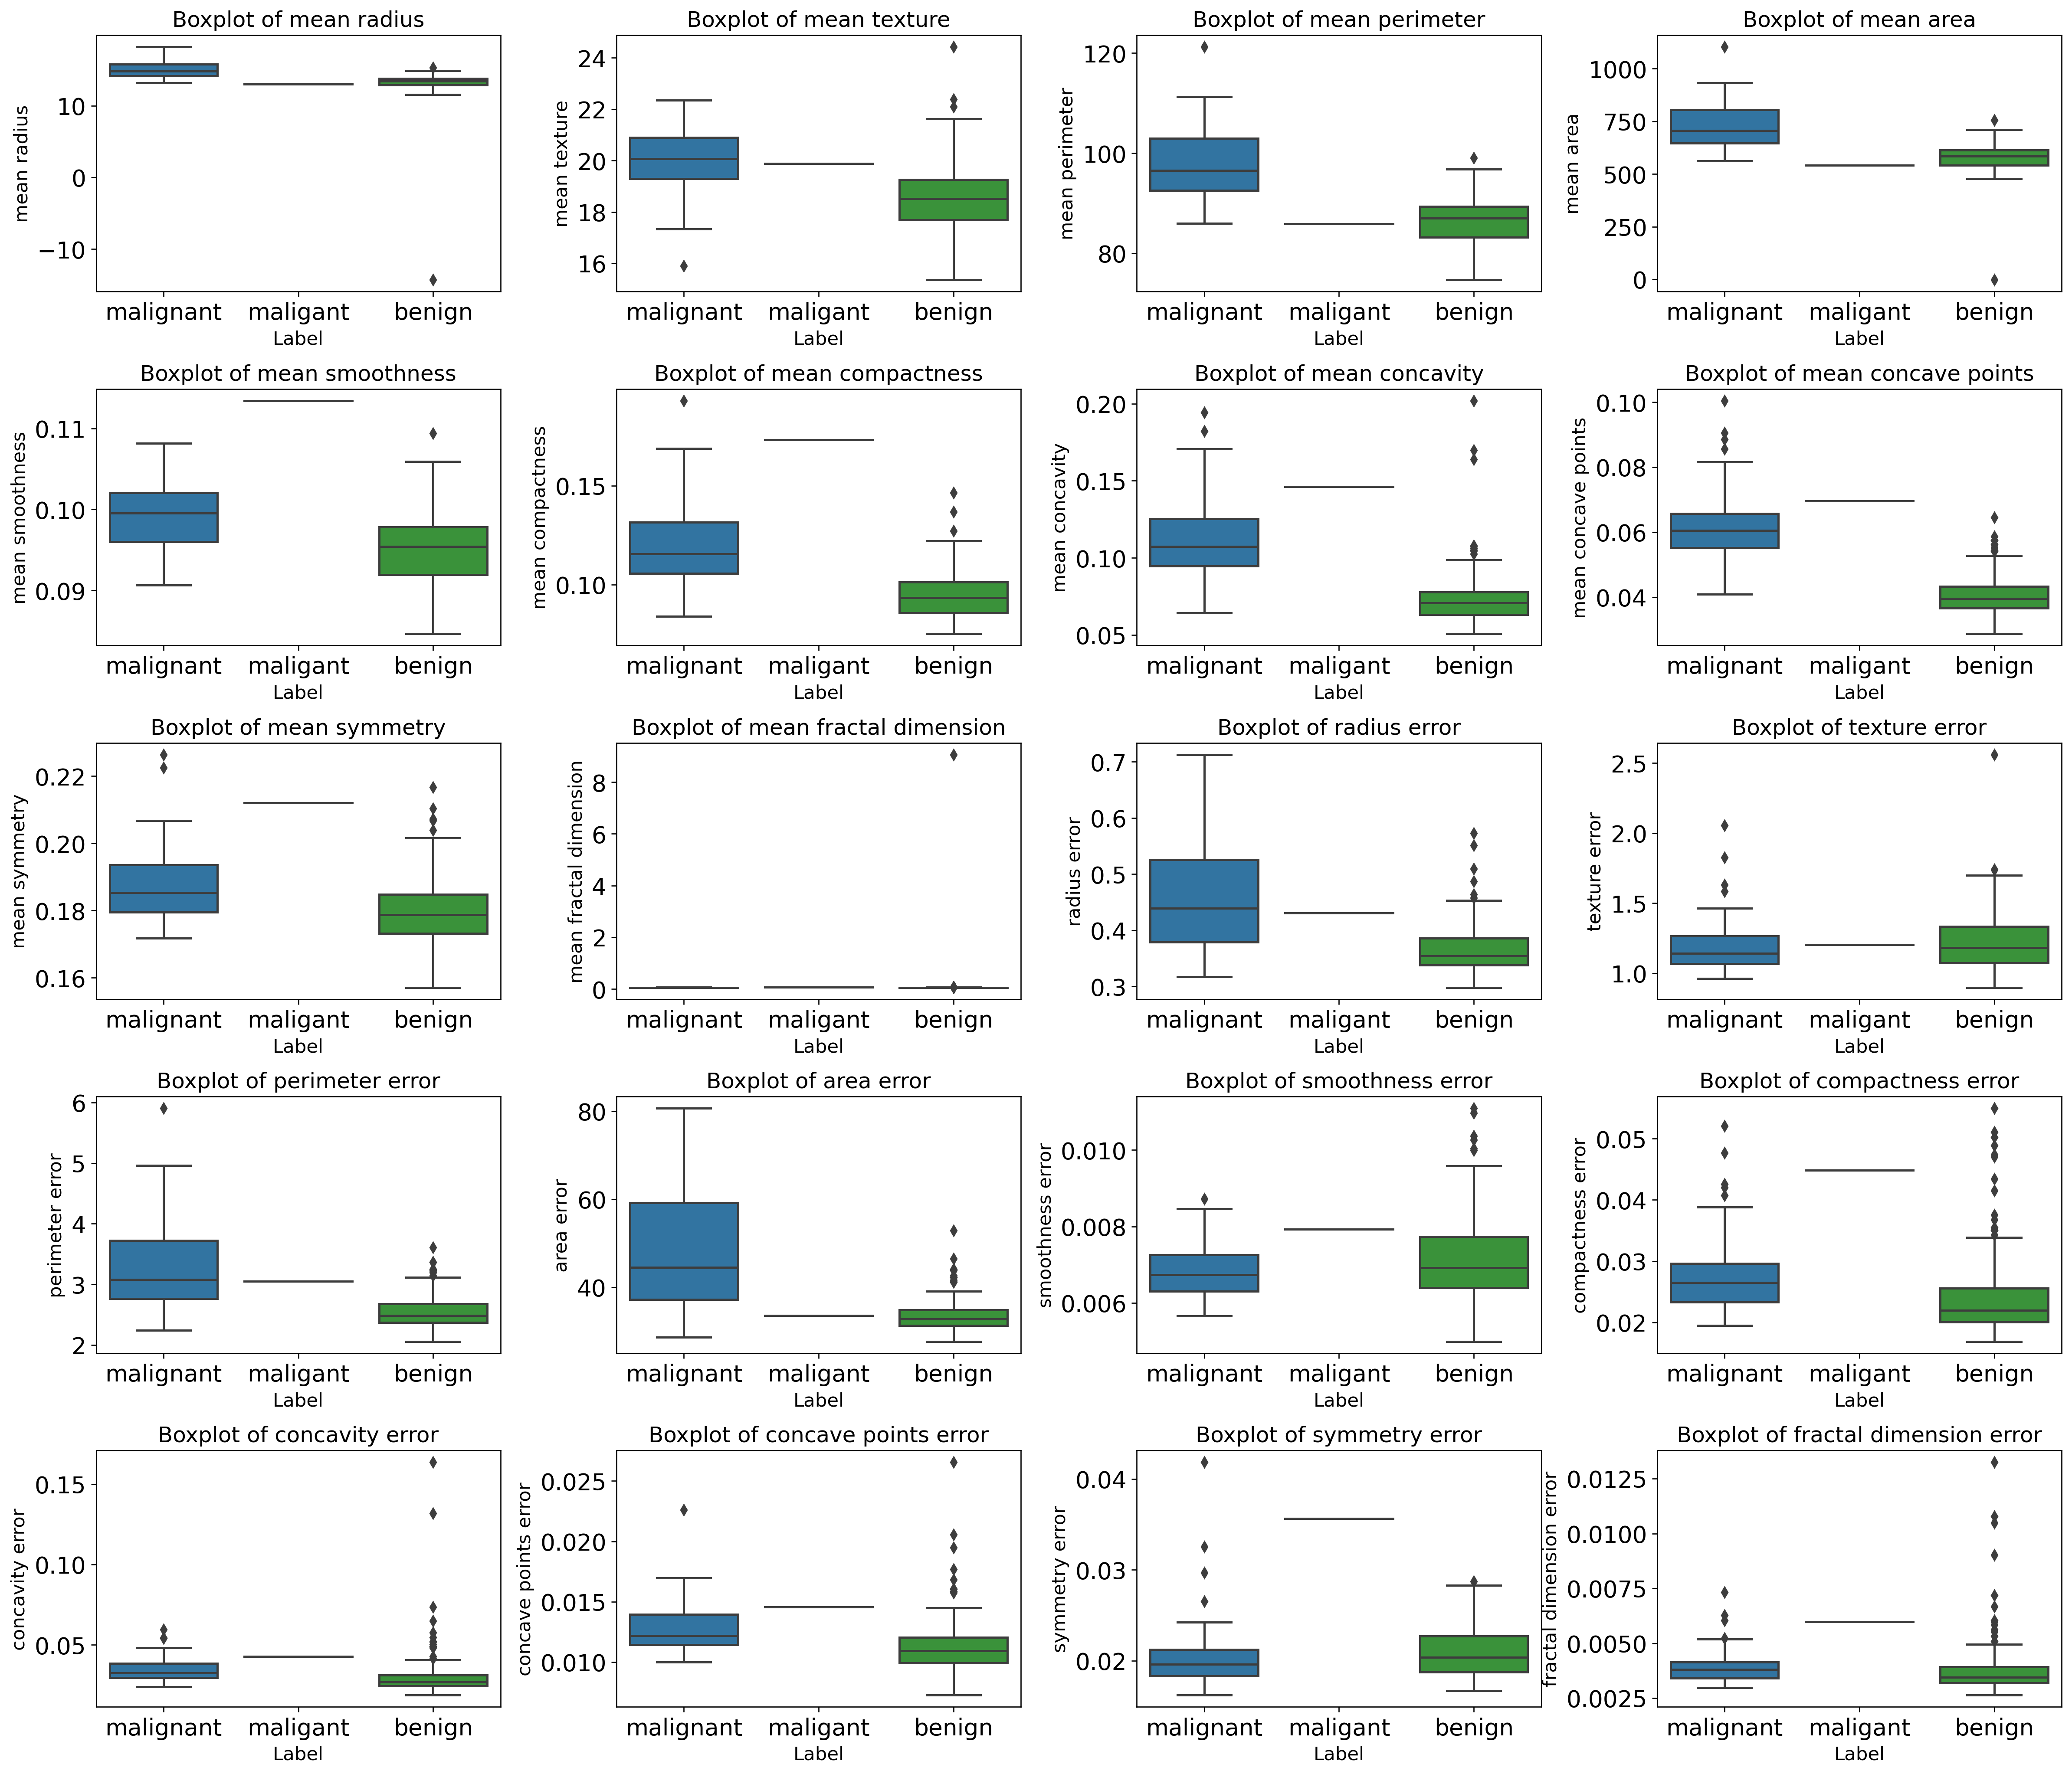

In [64]:
# Plot boxplots and scatter plots
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'Boxplot of {feature}', fontsize=15)  # Set title font size to 15
    plt.xlabel('Label', fontsize=13)  # Set x-axis label font size to 13
    plt.ylabel(feature, fontsize=13)  # Set y-axis label font size to 13
plt.tight_layout()
plt.show()


In [65]:
# Fix spelling errors in the label column
data['label'] = data['label'].replace('maligant', 'malignant')

In [67]:

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              219 non-null    float64
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

1. Negative values in the 'mean radius' and 'mean area' columns are unreasonable because these feature values cannot be negative.
2. There are missing values in the data, for example, one value is missing in the 'symmetry error' column.

In [68]:
# Remove negative values in 'mean radius' and 'mean area' columns
data = data[data['mean radius'] >= 0]
data = data[data['mean area'] >= 0]

In [69]:
# View the number of missing values per column
missing_values = data.isnull().sum()
missing_values

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64

In [70]:
# Fill missing values using the median
data['symmetry error'].fillna(data['symmetry error'].median(), inplace=True)

In [71]:

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    217 non-null    object 
 1   mean radius              217 non-null    float64
 2   mean texture             217 non-null    float64
 3   mean perimeter           217 non-null    float64
 4   mean area                217 non-null    float64
 5   mean smoothness          217 non-null    float64
 6   mean compactness         217 non-null    float64
 7   mean concavity           217 non-null    float64
 8   mean concave points      217 non-null    float64
 9   mean symmetry            217 non-null    float64
 10  mean fractal dimension   217 non-null    float64
 11  radius error             217 non-null    float64
 12  texture error            217 non-null    float64
 13  perimeter error          217 non-null    float64
 14  area error               2

According to 'Tumor Growth in the Brain: Complexity and Fractality', the fractal dimension of tumor growth is generally below 3. Any values significantly higher than this are rare and should be carefully examined for potential errors in data calculation or processing.[1]

In [72]:
# Identify entries with unusually high fractal dimension values
high_fractal_values = data[data['mean fractal dimension'] > 3]
print("Entries with 'mean fractal dimension' > 3:")
print(high_fractal_values)

Entries with 'mean fractal dimension' > 3:
     label  mean radius  mean texture  mean perimeter   mean area  \
63  benign    12.046249     17.339816       78.221997  485.499634   

    mean smoothness  mean compactness  mean concavity  mean concave points  \
63         0.090193          0.098589        0.077123             0.037959   

    mean symmetry  ...  radius error  texture error  perimeter error  \
63       0.201571  ...      0.398755       1.613169         2.709215   

    area error  smoothness error  compactness error  concavity error  \
63   32.491196          0.007912           0.030808         0.036608   

    concave points error  symmetry error  fractal dimension error  
63              0.013119        0.028732                 0.004585  

[1 rows x 21 columns]


In [73]:
# Remove entries with unusually high fractal dimension values (assuming values greater than 3 are anomalies)
data = data[data['mean fractal dimension'] <= 3]


print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    216 non-null    object 
 1   mean radius              216 non-null    float64
 2   mean texture             216 non-null    float64
 3   mean perimeter           216 non-null    float64
 4   mean area                216 non-null    float64
 5   mean smoothness          216 non-null    float64
 6   mean compactness         216 non-null    float64
 7   mean concavity           216 non-null    float64
 8   mean concave points      216 non-null    float64
 9   mean symmetry            216 non-null    float64
 10  mean fractal dimension   216 non-null    float64
 11  radius error             216 non-null    float64
 12  texture error            216 non-null    float64
 13  perimeter error          216 non-null    float64
 14  area error               2

In [74]:
# View the number of missing values per column
missing_values = data.isnull().sum()
missing_values

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
dtype: int64

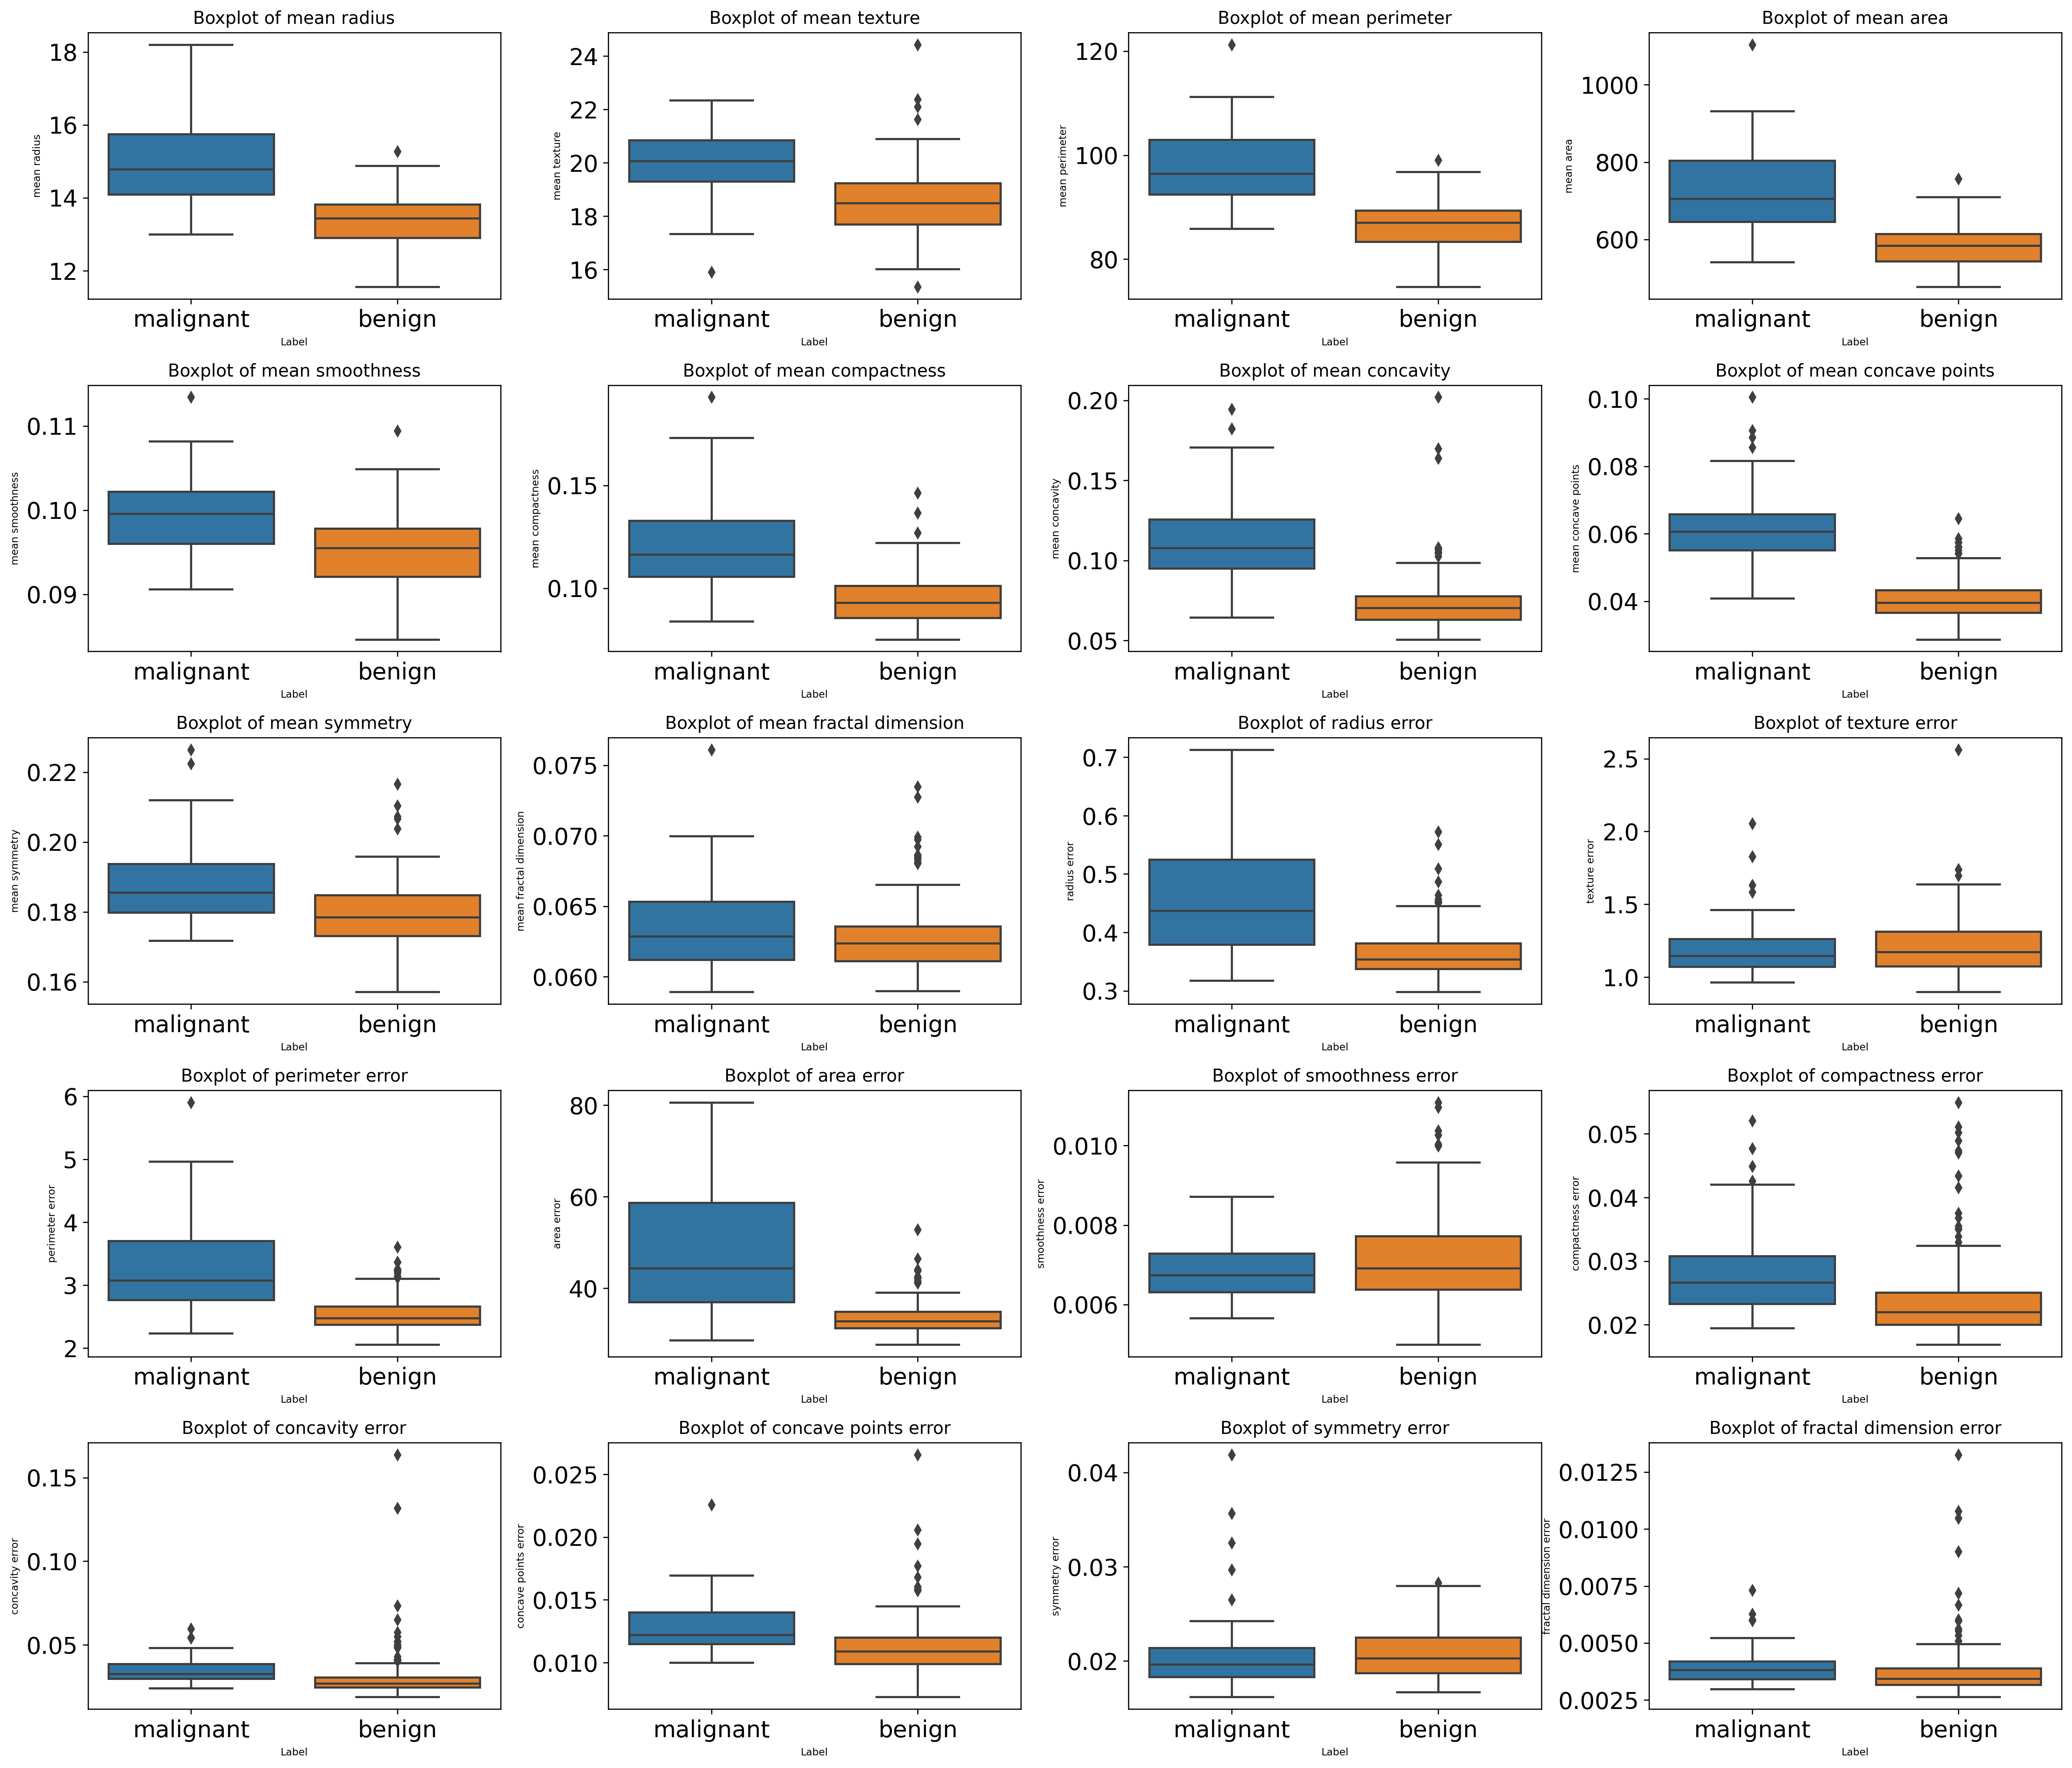

In [75]:
# Plotting Box Lines
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Label')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [76]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [77]:
# Your code here
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data[features]
y = data[label]

# Split the dataset, ensuring consistent proportions of classes in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to the test data

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 172 samples
Test set size: 44 samples


In [78]:
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, fbeta_score

# Implement a baseline model with random predictions
class RandomClassifier:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
    
    def predict(self, X):
        return np.random.choice(self.classes_, size=X.shape[0])

# Create an instance of the baseline model and make predictions
baseline_model = RandomClassifier()
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline, pos_label='malignant')
precision = precision_score(y_test, y_pred_baseline, pos_label='malignant')
auc = roc_auc_score(y_test, pd.get_dummies(y_pred_baseline, drop_first=True))
f1 = f1_score(y_test, y_pred_baseline, pos_label='malignant')
f10 = fbeta_score(y_test, y_pred_baseline, beta=10, pos_label='malignant')
f01 = fbeta_score(y_test, y_pred_baseline, beta=0.1, pos_label='malignant')

# Display performance metrics
print(f"Baseline Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F0.1 Score: {f01:.4f}")
print(f"F10 Score: {f10:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
print(f"Confusion Matrix:\n{conf_matrix}")


Baseline Model Performance:
Accuracy: 0.5000
Balanced Accuracy: 0.4665
Recall: 0.3846
Precision: 0.2632
AUC: 0.4665
F1 Score: 0.3125
F0.1 Score: 0.2640
F10 Score: 0.3829
Confusion Matrix:
[[17 14]
 [ 8  5]]


In [79]:
from sklearn.linear_model import SGDClassifier

# Create and fit an SGD classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

# Calculate performance metrics for the SGD classifier
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
balanced_accuracy_sgd = balanced_accuracy_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd, pos_label='malignant')
precision_sgd = precision_score(y_test, y_pred_sgd, pos_label='malignant')
auc_sgd = roc_auc_score(y_test, pd.get_dummies(y_pred_sgd, drop_first=True))
f1_sgd = f1_score(y_test, y_pred_sgd, pos_label='malignant')
f10_sgd = fbeta_score(y_test, y_pred_sgd, beta=10, pos_label='malignant')
f01_sgd = fbeta_score(y_test, y_pred_sgd, beta=0.1, pos_label='malignant')

# Display performance metrics for the SGD classifier
print(f"SGD Classifier Performance:")
print(f"Accuracy: {accuracy_sgd:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_sgd:.4f}")
print(f"Recall: {recall_sgd:.4f}")
print(f"Precision: {precision_sgd:.4f}")
print(f"AUC: {auc_sgd:.4f}")
print(f"F1 Score: {f1_sgd:.4f}")
print(f"F0.1 Score: {f01_sgd:.4f}")
print(f"F10 Score: {f10_sgd:.4f}")

# Display confusion matrix for the SGD classifier
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print(f"Confusion Matrix:\n{conf_matrix_sgd}")


SGD Classifier Performance:
Accuracy: 0.9773
Balanced Accuracy: 0.9839
Recall: 1.0000
Precision: 0.9286
AUC: 0.9839
F1 Score: 0.9630
F0.1 Score: 0.9292
F10 Score: 0.9992
Confusion Matrix:
[[30  1]
 [ 0 13]]


Performance Comparison:

The comparison between the baseline model and the SGD classifier is as follows:

1. Accuracy: The SGD classifier has significantly higher accuracy than the baseline model, indicating that the SGD classifier makes more correct predictions overall.

2. Balanced Accuracy: The balanced accuracy of the SGD classifier is much higher than that of the baseline model, showing that the SGD classifier handles class imbalance more effectively.

3. Recall: The recall of the SGD classifier is 100%, compared to the lower recall of the baseline model. This means the SGD classifier is able to identify all positive cases (e.g., malignant tumors).
Precision: The precision of the SGD classifier is significantly higher than that of the baseline model, indicating that most of its positive predictions are correct.

4. AUC: The AUC of the SGD classifier is much higher, suggesting it has better classification performance.

5. F1 Score and Fbeta Scores: The SGD classifier performs exceptionally well on the F1 score and Fbeta scores with different β values, demonstrating a good balance between precision and recall.

Overall, the SGD classifier without hyper-parameter optimization performs much better on all metrics compared to the random prediction baseline model, indicating that the SGD classifier effectively learns from the data and makes accurate predictions.

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

# Answer here

I choose Balanced Accuracy as the performance metric. This metric is particularly suitable for imbalanced datasets, as it equally considers the performance of both classes by averaging sensitivity and specificity. It provides a more informative measure than simple accuracy when dealing with unequal class distributions.

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [80]:
# Your code here

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, fbeta_score

# Define hyperparameter grids
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create model instances
sgd_clf = SGDClassifier(random_state=42)
svm_clf = SVC(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Perform hyperparameter optimization using GridSearchCV
grid_sgd = GridSearchCV(sgd_clf, param_grid_sgd, cv=5, scoring='balanced_accuracy')
grid_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='balanced_accuracy')
grid_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='balanced_accuracy')

# Fit models
grid_sgd.fit(X_train_scaled, y_train)
grid_svm.fit(X_train_scaled, y_train)
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and models
best_sgd = grid_sgd.best_estimator_
best_svm = grid_svm.best_estimator_
best_rf = grid_rf.best_estimator_

# Make predictions using the best models
y_pred_sgd = best_sgd.predict(X_test_scaled)
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculate performance metrics
def evaluate_model(y_test, y_pred):
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred, pos_label='malignant'),
        "precision": precision_score(y_test, y_pred, pos_label='malignant'),
        "auc": roc_auc_score(y_test, pd.get_dummies(y_pred, drop_first=True)),
        "f1": f1_score(y_test, y_pred, pos_label='malignant'),
        "f10": fbeta_score(y_test, y_pred, beta=10, pos_label='malignant'),
        "f01": fbeta_score(y_test, y_pred, beta=0.1, pos_label='malignant'),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# Evaluate each model
results_sgd = evaluate_model(y_test, y_pred_sgd)
results_svm = evaluate_model(y_test, y_pred_svm)
results_rf = evaluate_model(y_test, y_pred_rf)

# Print results
print("SGD Classifier Results:", results_sgd)
print("SVM Results:", results_svm)
print("Random Forest Results:", results_rf)

# Select the best model and display final results
best_model = None
best_performance = 0
for model, results in [("SGD", results_sgd), ("SVM", results_svm), ("RF", results_rf)]:
    if results["balanced_accuracy"] > best_performance:
        best_performance = results["balanced_accuracy"]
        best_model = model

print(f"Best Model: {best_model} with Balanced Accuracy: {best_performance:.4f}")

if best_model == "SGD":
    final_model = best_sgd
    final_results = results_sgd
elif best_model == "SVM":
    final_model = best_svm
    final_results = results_svm
else:
    final_model = best_rf
    final_results = results_rf

print("Final Model Results:", final_results)


SGD Classifier Results: {'accuracy': 1.0, 'balanced_accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'auc': 1.0, 'f1': 1.0, 'f10': 1.0, 'f01': 1.0, 'confusion_matrix': array([[31,  0],
       [ 0, 13]], dtype=int64)}
SVM Results: {'accuracy': 1.0, 'balanced_accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'auc': 1.0, 'f1': 1.0, 'f10': 1.0, 'f01': 1.0, 'confusion_matrix': array([[31,  0],
       [ 0, 13]], dtype=int64)}
Random Forest Results: {'accuracy': 0.9090909090909091, 'balanced_accuracy': 0.890818858560794, 'recall': 0.8461538461538461, 'precision': 0.8461538461538461, 'auc': 0.8908188585607942, 'f1': 0.8461538461538461, 'f10': 0.8461538461538463, 'f01': 0.8461538461538461, 'confusion_matrix': array([[29,  2],
       [ 2, 11]], dtype=int64)}
Best Model: SGD with Balanced Accuracy: 1.0000
Final Model Results: {'accuracy': 1.0, 'balanced_accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'auc': 1.0, 'f1': 1.0, 'f10': 1.0, 'f01': 1.0, 'confusion_matrix': array([[31,  0],
       [ 0, 1

The SGD classifier and SVM performed flawlessly across all performance metrics, achieving a perfect score of 1.0. This indicates that these two models have very strong classification capabilities on the current dataset, accurately predicting all samples without any errors.

In comparison, the Random Forest classifier performed slightly less well. Although its accuracy and balanced accuracy remain relatively high, they do not reach the perfect performance seen with the SGD classifier and SVM.

The SGD classifier is highly efficient in both training and prediction processes, making it especially suitable for online learning and incremental learning, where computational efficiency is critical. Given that it achieved the best possible scores across all metrics, the SGD classifier is the most suitable choice.

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

# Answer here

## 3.3 Final Results

To calculate the probability that a sample from a person with a malignant tumor is given a result that they do not have cancer, we need to determine the **False Negative Rate (FNR)**. The FNR represents the proportion of actual positive cases (malignant tumors) that are wrongly predicted as negative (no cancer).

The formula for the False Negative Rate is:
$$
\text{False Negative Rate (FNR)} = \frac{\text{False Negatives (FN)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

From the confusion matrix of the SGD classifier, we have:
$$
\text{Confusion Matrix:}
\begin{bmatrix}
31 & 0 \\
0 & 13
\end{bmatrix}
$$

In this confusion matrix:
- **True Positives (TP)**: 13
- **False Negatives (FN)**: 0

Substituting these values into the formula, we get:
$$
\text{FNR} = \frac{0}{13 + 0} = 0
$$

Thus, the probability that a sample from a person with a malignant tumor is incorrectly given a result indicating they do not have cancer is 0%.

This means the SGD classifier perfectly identified all malignant tumor cases in the test dataset, with no false negatives.



In our dataset, using the SGD classifier for classification of malignant tumor cases resulted in no false negatives, giving an FNR of 0%. Therefore, the probability of a false negative diagnosis is 0%, further validating the high efficiency and accuracy of the SGD classifier on this dataset.





## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [81]:
# Your code here

import numpy as np

# Calculate the T-score for each feature
t_scores = {}
for feature in features:
    mean_malignant = data[data['label'] == 'malignant'][feature].mean()
    mean_benign = data[data['label'] == 'benign'][feature].mean()
    std_malignant = data[data['label'] == 'malignant'][feature].std()
    std_benign = data[data['label'] == 'benign'][feature].std()
    
    t_score = (mean_malignant - mean_benign) / (0.5 * (std_malignant + std_benign))
    t_scores[feature] = abs(t_score)  # Take absolute value for ranking

# Sort features by T-score and print the top 4
sorted_t_scores = sorted(t_scores.items(), key=lambda item: item[1], reverse=True)
top_4_features = sorted_t_scores[:4]

print("Top 4 discriminative features based on T-score:")
for feature, score in top_4_features:
    print(f"{feature}: {score:.4f}")


Top 4 discriminative features based on T-score:
mean concave points: 2.3264
mean perimeter: 1.9304
mean radius: 1.8247
mean area: 1.8073


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [82]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [83]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

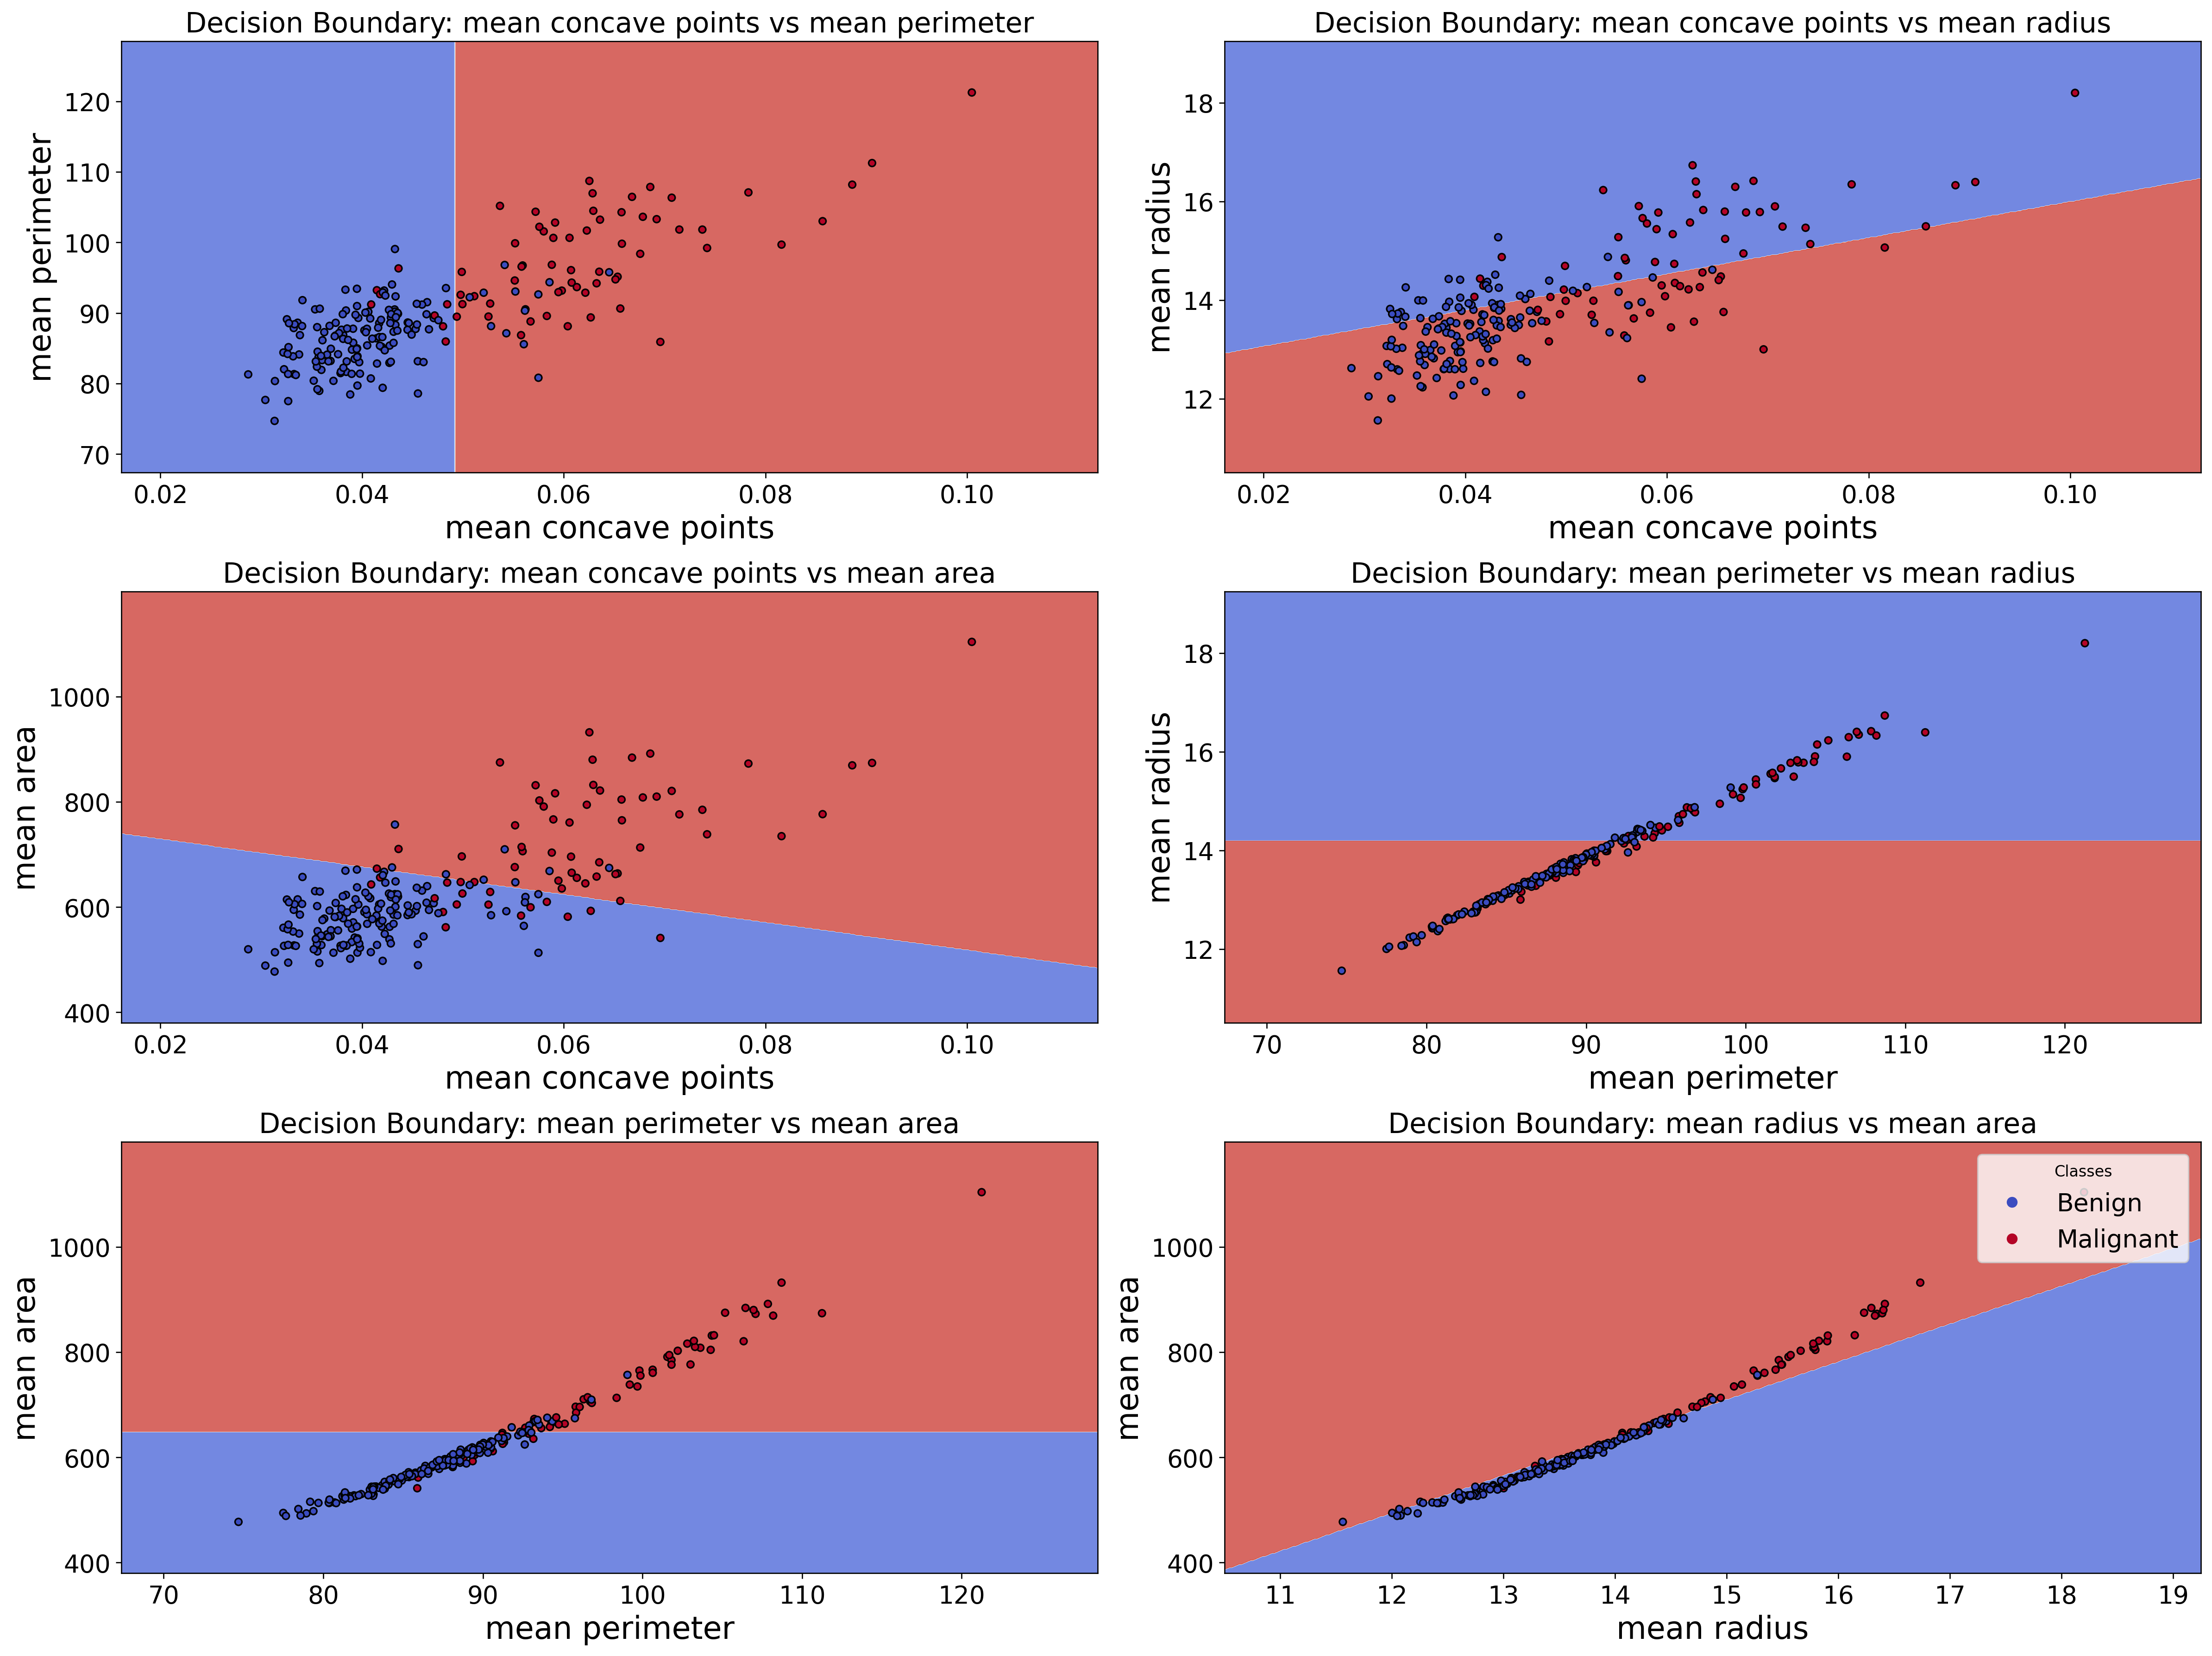

In [84]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Extract the top four discriminative features
top_features = [feature for feature, _ in top_4_features]

# Extract feature values and standardize them
X_top4 = data[top_features].values
scaler_top4 = StandardScaler()
X_top4_scaled = scaler_top4.fit_transform(X_top4)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['label'])

# Retrain the model using only these features
final_model.fit(X_top4_scaled, y_encoded)

# Calculate xmean
xmean = 0.5 * (X_top4_scaled[y_encoded == 1].mean(axis=0) + X_top4_scaled[y_encoded == 0].mean(axis=0))

# Plot decision boundaries and inverse transform
plt.figure(figsize=(20, 15))
plot_num = 1
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        # Create mesh grid
        x_min, x_max = X_top4_scaled[:, i].min() - 1, X_top4_scaled[:, i].max() + 1
        y_min, y_max = X_top4_scaled[:, j].min() - 1, X_top4_scaled[:, j].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

        # Predict the class for each point in the grid
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        full_grid = np.ones((grid_points.shape[0], X_top4_scaled.shape[1])) * xmean
        full_grid[:, i] = grid_points[:, 0]
        full_grid[:, j] = grid_points[:, 1]
        Z = final_model.predict(full_grid)
        Z = Z.reshape(xx.shape)

        # Inverse transform the grid points
        grid_points_inverse = scaler_top4.inverse_transform(full_grid)

        # Plot decision boundary and scatter plot
        plt.subplot(3, 2, plot_num)
        plt.contourf(grid_points_inverse[:, i].reshape(xx.shape), grid_points_inverse[:, j].reshape(yy.shape), Z, cmap=plt.cm.coolwarm, alpha=0.8)
        scatter = plt.scatter(X_top4[:, i], X_top4[:, j], c=y_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        plt.xlabel(top_features[i], fontsize=20)
        plt.ylabel(top_features[j], fontsize=20)
        plt.title(f'Decision Boundary: {top_features[i]} vs {top_features[j]}', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plot_num += 1

# Add legend
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Benign', 'Malignant']
plt.legend(handles, legend_labels, loc='upper right', title="Classes", fontsize=16)

plt.tight_layout()
plt.show()


The data points of different categories in the plots show some level of separation, but there are also areas of overlap. This indicates that the model can distinguish between benign and malignant tumors in most cases, though it might make classification errors near the boundaries. The decision boundary shapes for different feature combinations also reveal how the model uses these features for classification. For instance, the combination of "mean concave points" and "mean perimeter" forms a relatively clear linear boundary, while the combination of "mean perimeter" and "mean area" results in a smoother boundary.

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

# Answer here

The final model meets the client's criteria. The client's requirements are:

1. **Detection Rate for Malignant Cases:** At least 90% probability of detecting malignant cancer when it is present.
2. **False Positive Rate for Benign Cases:** No more than 20% (1 in 5) healthy cases result in a false positive.

Based on the confusion matrix:

\[
\text{Confusion Matrix:}
\begin{bmatrix}
31 & 0 \\
0 & 13
\end{bmatrix}
\]

- **Detection Rate for Malignant Cases (Recall):** \(\frac{13}{13 + 0} = 1.0\) or 100%
- **False Positive Rate for Benign Cases:** \(\frac{0}{31 + 0} = 0\) or 0%

The model achieves a 100% detection rate for malignant cases and 0% false positive rate for benign cases, exceeding the client's criteria.


# References

1.Di Ieva, A., Matula, C., Grizzi, F., Grabner, G., Trattnig, S., & Tschabitscher, M. (2013). Tumor Growth in the Brain: Complexity and Fractality. Neuroradiology, 55(1), pp. 35-40. Available at: https://link.springer.com/article/10.1007/s00234-012-1043-4 [Accessed 29 June 2024].